In this homework, you need to solve two tasks. For problems with theoretical calculations, you need to show a sufficient number of intermediate steps to explain how you have obtained the result. 
* Formulas are expected in Latex style inside the notebook. The assignment should be uploaded in Jupyter Notebook format(`.ipynb`). 
* Overall, there are 45 points, however, you can get a maximum of 40 points for this assignment( `your_points = max(your_points, 40)`). 
* No bonus points will be transferred to the next assignment.

# Task 1. Moscow weather (20 points)

In this task you need to estimate parameters and their confidence intervals for a given sample. As data, you will explore Moscow weather. You can look at some visualizations of martian weather [here](https://pudding.cool/2018/01/mars-weather/) (completely unrelated to Moscow weather, though).

First of all, you will need some libraries. Also, fix random seed to get reproducable results.

In [1]:
import numpy as np
from numpy.random import choice, seed
import pandas as pd
from scipy.stats import sem, norm, skew, chi2
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import scipy

np.random.seed(321)

In [2]:
import matplotlib as mp
import matplotlib.font_manager

titlesize = 20
labelsize = 16
legendsize = labelsize
xticksize = 14
yticksize = xticksize

mp.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
mp.rcParams['legend.handletextpad'] = 0.5
mp.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
mp.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
mp.rcParams['font.size'] = 12
mp.rcParams['font.family'] = 'serif'
mp.rcParams['font.serif'] = 'Times New Roman'
mp.rcParams['axes.labelsize'] = labelsize
mp.rcParams['axes.titlesize'] = titlesize
mp.rcParams['axes.unicode_minus'] = False

mp.rc('xtick', labelsize=xticksize)
mp.rc('ytick', labelsize=yticksize)
mp.rc('legend', fontsize=legendsize)

mp.rc('font', **{'family':'serif'})

## Part 1. Load data (1 point)

You need to load data from `moscow-weather.csv`, take feature for your variant, remove absent values (`Nan`s) and convert sample to `int` type. 

### b)

`feature_name = "TMAX"`

In [3]:
feature_name = "TMAX"
df = pd.read_csv("moscow-weather.csv")[feature_name]
sample_full = df.dropna().values.astype(int)

Let's take a five month period or ~ 150 days. Sample them randomly from full sample using function `choice`(from `numpy.random`) with parameter `replace=False`.

In [4]:
np.random.seed(321)
N = 150
sample_part = np.random.choice(sample_full, size=N, replace=False)
sample_part

array([  0,   2,  21,  20,  29,  14,   2,  23,  16,   3,  21,  16,   6,
       -12,   6,   0,  -1,  28,  10,  -7,  13,   0,  -8,   2,   0,  21,
        -3,  -1,  17,  -1,  23,  25,   6,  19,  -5,   8, -23,  28,  10,
         0,  13,  23,  27,  25,  17,  17,  14,  21,  -1,   1,  20,   3,
        -2,   3,   1,  27,  -1,  18,  -7,  -4,  22,  12,   9,  28,  33,
         7,  -4,   0,  20,  21,  27,  17,  21,   2,   4, -11,  21,   3,
         5,  19,   3,  -3,  16,   2,  16,   5,  26,  18,  21,  24,   4,
        -2,  -8,  10,  20,  25,   4,   0,  24,  27,  -1,  22,  24,  31,
       -10,   2,  24,   0,   3,   9,  16,   7,   9,   5, -14,  11,   7,
        20,   2, -19,  13,   4,  17,   4,   5,  24,   6,  16,  19,  23,
         5,   5,  14,  16,  22,   2,  19,  20,  17,   8,  14,  17,  14,
        16,   5,  11,   2,  12,  25,  12])

Plot values frequences for full and partial sample using bar plot.

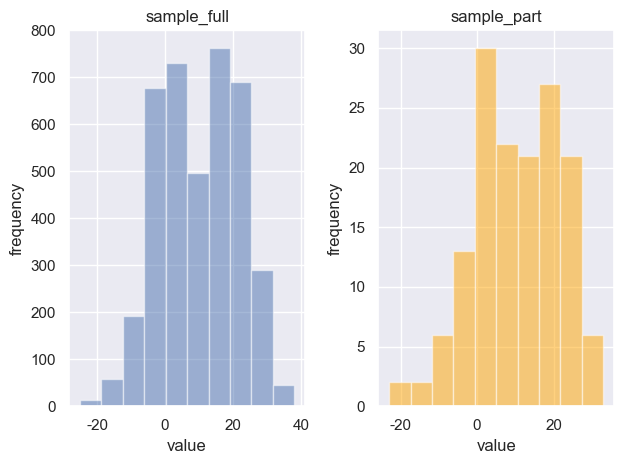

In [5]:
sns.set_theme()
#, figsize=(12, 6)
fig, ((ax1, ax2)) = plt.subplots(1, 2)

ax1.hist(sample_full, alpha=0.5)
ax1.set_title("sample_full")
ax1.set_xlabel("value")
ax1.set_ylabel("frequency")

ax2.hist(sample_part, color='orange', alpha=0.5)
ax2.set_title("sample_part")
ax2.set_xlabel("value")
ax2.set_ylabel("frequency")

fig.tight_layout()

plt.show()

## Part 2. Parameter estimation (6 points)
Find the following parameters' estimates and their 95% confidence intervals (except for `mode` and `skewness`). You need to show theoretical calculations (with intermediate steps) for estimates and intervals (with intermediate steps) and then make simulation.

### a) Mean and CI

We have $n$ random samples from the initial distribution. And in that particular case it is possible to write: $$X_n = \{X_1, ..., X_n\} \textasciitilde i.i.d.$$


$$ \hat{mean} = \bar{X}_n  = \frac{1}{n}\sum_{k=1}^nX_k$$

For the convenience further will be used the $\bar{X}_n$ to denote $ \hat{mean}$.\
The next step to estimate the confidence interval is to implement the Z-statistics to bring the distribution to the $\mathcal{N}(0,1)$ form. According to the Central Limit Theorem:

$$Z_n = \frac{\sqrt{n}(\bar{X}_n - \mathop{\mathbb{E}}\bar{X}_n)}{\sigma} \rightsquigarrow \mathcal{N}(0,1)$$

It is required to find a $\sigma$. It is possible with the following formula for the sample variance:

$$\hat{\sigma}_n^2 = \frac{\sum_{i=1}^n(X_i - \bar{X}_n)^2}{n}$$

One more remark: the confidence level is denoted like: $$1 - \alpha = 0.95$$
As it is required to get a two-tailed interval, the confidence level will be divided by 2.

The general formula for the confidence interval is the following:

$$CI(\hat{mean}) = (\bar{X}_n- z_{\frac{\alpha}{2}}\sqrt{\frac{\hat{\sigma}_n^2}{n}}; \bar{X}_n + z_{\frac{\alpha}{2}}\sqrt{\frac{\hat{\sigma}_n^2}{n}})$$

In [6]:
# Your code here

def calc_mean(data, alpha, n):
    mean = np.mean(data)
    z = norm.ppf(1 - alpha / 2)
    var = np.var(data, ddof=0)
    return mean, (mean - z * np.sqrt(var / n), mean + z * np.sqrt(var / n))


mean, (lower, upper) = calc_mean(sample_part, alpha=0.05, n=150)
f"Mean {mean:.3f} with confidence interval ({lower:.3f}, {upper:.3f})"

'Mean 10.440 with confidence interval (8.650, 12.230)'

### b) Median and CI

Assuming that PDF is continuous at the median point, it is possible to do the following:

$$ \hat{median} = arg\min_m \sum_{k=1}^n |X_k-m|$$

$$f(\hat{median}) = \frac{1}{\sqrt{2\pi\sigma^2}},$$
where $f$ - a pdf function.

According to Laplace, it is possible to write the following:

$$\frac{\hat{median}_n - median}{\sqrt{\frac{\pi\sigma^2}{2n}}} \leadsto \mathcal{N}(0,1)$$

Hence,
$$\mathbb{P}\Bigg(-z_{1 - \frac{\alpha}{2}} < \frac{\hat{median}_n - median}{\sqrt{\frac{\pi\hat\sigma^2_n}{2n}}} < z_{1 - \frac{\alpha}{2}}\Bigg) \longrightarrow 1 - \alpha$$

And the confidence interval for the median can be found like that:

$$ CI(\hat{median}) = \bigg(\hat{median}_n - z_{1 - \frac{\alpha}{2}}\sqrt{\frac{\pi\hat\sigma^2_n}{2n}}, \hat{median}_n + z_{1 - \frac{\alpha}{2}}\sqrt{\frac{\pi\hat\sigma^2_n}{2n}}\bigg)$$

In [7]:
# Your code here

def calc_median(data, alpha, n):
    z = stats.norm.ppf(1 - alpha / 2)

    median = np.median(data)
    var = np.var(data, ddof=0)

    sem_int = z * np.sqrt(np.pi * var / (2 * n))
    left_tail, right_tail = median - sem_int, median + sem_int

    return median, (left_tail, right_tail)

median, (lower, upper) = calc_median(sample_part, alpha=0.05, n=150)
f"Median {median:.3f} with normal-based confidence interval ({lower:.3f}, {upper:.3f})"

'Median 10.500 with normal-based confidence interval (8.257, 12.743)'

### c) Variance and CI

Assuming that the sample comes from a normal distribution, but the mean and variance are not known, allows to implement the Fisher's theorem for the normal samples:

$$H = \frac{(n-1)S^2}{\sigma_n^2},$$
where $S^2$ - an unbiased sample variance. $H$ has the $\chi^2(n-1)$ distribution.

$$ \hat{Variance} = \sigma_n^2 = \frac{\sum_{i=1}^n(X_i-\bar{X})^2}{n-1}$$


For the convenience further $\hat{Variance}$ will be denoted like $\sigma^2$.

$$ CI(\hat{Variance}) = \mathbb{P}(\frac{nS^2}{\chi_{1-\frac{\alpha}{2}, n-1}^2} \leq \sigma^2 \leq \frac{nS^2}{\chi_{\frac{\alpha}{2}, n-1}^2})$$

In [8]:
# Your code here

def calc_variance(data, alpha, n):
    
    var = np.var(data, ddof=0)
    left_tail, right_tail = var / chi2.ppf([1 - alpha / 2, alpha / 2], df=n-1)
    return var, (n * left_tail, n * right_tail)


var, (lower, upper) = calc_variance(sample_part, alpha=0.05, n=150)
f"Variance {var:.3f} with confidence interval ({lower:.3f}, {upper:.3f})"

'Variance 125.073 with confidence interval (101.582, 160.216)'

### d) Mode (most frequent value in a sample)

In [9]:
# Your code here

mode = stats.mode(sample_part)[0]
f"Mode: {mode}"

'Mode: 2'

### e) Skewness

In [10]:
# Your code here

skewness = skew(sample_part)
f"Skewness: {skewness:e}"

'Skewness: -2.649629e-01'

## Part 3. Bootstrap (4 points)

Find confidence intervals for following estimates using bootsrap. Use function `choice` with parameter `replace=True` for bootstrap sampling. Try different numbers of generated samples.

In [11]:
# Using several functions from the seminars:

np.random.seed(321)

def boot_estimates(estimator, X, num_resamples=150):
    estimates = np.empty(num_resamples)
    for i in range(num_resamples):
        estimates[i] = estimator(np.random.choice(X, size=len(X), replace=True))
    return estimates

def normal_interval(estimates, level=0.95):
    alpha = 1 - level
    s_boot = estimates.std()
    z = scipy.stats.norm.ppf(1 - alpha/2)
    m = estimates.mean()
    return m - z * s_boot, m + z * s_boot

### a) Mean and CI

In [12]:
# Your code here
np.random.seed(321)

def boot_interval_mean(estimates, level=0.95):
    alpha = 1 - level
    m = np.mean(estimates)
    return m, (2 * m - np.quantile(estimates, 1 - alpha), 2 * m - np.quantile(estimates, alpha))

mean, (lower, upper) = boot_interval_mean(boot_estimates(np.mean, sample_part, num_resamples=150))
f"Mean {mean:.3f} with confident interval ({lower:.3f}, {upper:.3f})"

'Mean 10.430 with confident interval (8.895, 11.683)'

### b) Median and CI

In [13]:
np.random.seed(321)

median, (lower, upper) = np.median(sample_part), normal_interval(boot_estimates(np.median, sample_part))
f"Median {median:.3f} with normal-based confident interval ({lower:.3f}, {upper:.3f})"

'Median 10.500 with normal-based confident interval (6.886, 14.034)'

### c) Variance and CI

In [14]:
# Your code here

np.random.seed(321)

var, (lower, upper) = np.var(sample_part), normal_interval(boot_estimates(np.var, sample_part))
f"Variance {var:.3f} with confident interval ({lower:.3f}, {upper:.3f})"

'Variance 125.073 with confident interval (99.117, 149.073)'

## Part 4. Comparison with true values (1 point)

Compare with estimates calculated over full sample. Write conclusion about estimates and their confidence intervals obtained without and with bootstrap. Also, you can share some conclusions about Moscow weather :)

In [15]:
# Your code here

mean = np.mean(sample_full)
median = np.median(sample_full)
var = np.var(sample_full)
moda = stats.mode(sample_full)
skewness = skew(sample_full)

print("Mean:", mean)
print("Median:", median)
print("Var:", var)
print("Moda:", moda[0])
print("Skewness:", skewness)

Mean: 10.136467020470054
Median: 10.0
Var: 129.60482886250853
Moda: 0
Skewness: -0.08107692908401624


The bootstrap confidence intervals are smaller, than the intervals without it.

## Part 5. Confidence intervals and sample size (8 points)

Compare the size of confidence intervals **for the mean** obtained without and with bootstrap. Additionally, compare the empirical coverage of different confidence intervals (by generating sufficient number of samples of corresponding size and calculating proportion of cases when the interval covers the mean of the full sample). Consider sizes `[32, 64, 128, 256, 512, 1024]`. Plot results and make conclusion about their accuracy.

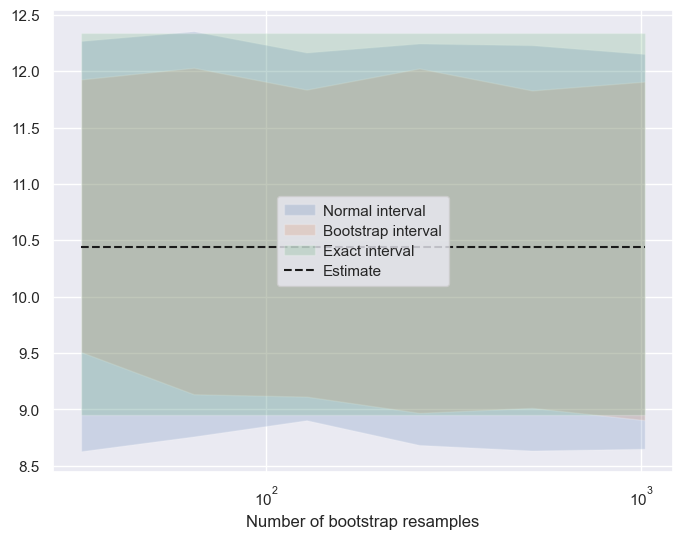

In [16]:
# Compare size of confidence intervals obtained without and with bootstrap
# Your code here

np.random.seed(1337)
sizes = np.r_[32, 64, 128, 256, 512, 1024]

def exp_exact_interval(X, level=0.95):
    return 2 * X.sum() / scipy.stats.chi2.interval(level, df=2 * len(X))[::-1]

exact_int = exp_exact_interval(sample_part)

def new_calc_mean(data, level=0.95):
    n=150
    alpha = 1 - level
    mean = data.mean()
    z = norm.ppf(1 - alpha / 2)
    var = np.var(data, ddof=0)
    return mean - z * np.sqrt(var), mean + z * np.sqrt(var)


norm_ints = np.empty((len(sizes), 2))
boot_ints = np.empty_like(norm_ints)
for i, s in enumerate(sizes):
    norm_ints[i] = new_calc_mean(boot_estimates(np.mean, sample_part, num_resamples=s))
    boot_ints[i] = boot_interval_mean(boot_estimates(np.mean, sample_part, num_resamples=s))[1]

plt.figure(figsize=(8, 6))
plt.fill_between(sizes, norm_ints[:, 0], norm_ints[:, 1], alpha=0.2, label='Normal interval')
plt.fill_between(sizes, boot_ints[:, 0], boot_ints[:, 1], alpha=0.2, label='Bootstrap interval')
plt.fill_between(sizes, [exact_int[0]] * len(sizes), [exact_int[1]] * len(sizes), alpha=0.2, label='Exact interval')
plt.plot(sizes, [sample_part.mean()]*len(sizes), 'k--', label='Estimate')
plt.xscale('log')
plt.xlabel('Number of bootstrap resamples')
plt.legend(loc='center')

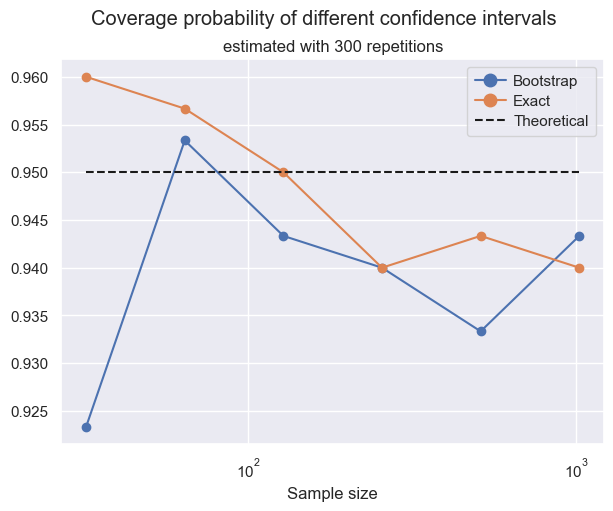

In [17]:
# Compare the empirical coverage of different confidence intervals
# Your code here

np.random.seed(1337)
sizes = np.r_[32, 64, 128, 256, 512, 1024]
num_repeats = 300


def get_cov_prob(y_pred, y_lower, y_upper, y_true, rtol=1.e-4, atol=1.e-6):
    """
    Calculate coverage probability given true output, predicted mean and confidence limits.
    Additionally check if prediction is very close to the true output.
    """
    n_cov = (((y_true >= y_lower) & (y_true <= y_upper))
                 | np.isclose(y_pred, y_true, rtol=rtol, atol=atol)) \
        .astype(float)
    p_cov = np.mean(n_cov)
    return n_cov.sum().astype(int), p_cov



n_cov_exact = np.empty(len(sizes))
p_cov_exact = np.empty_like(n_cov_exact)
n_cov_boot = np.empty_like(n_cov_exact)
p_cov_boot = np.empty_like(n_cov_exact)

for i, s in enumerate(sizes):
    boot_ints = np.empty((num_repeats, 2))
    exact_ints = np.empty((num_repeats, 2))
    estimates = np.empty(num_repeats)
    for j in range(num_repeats):
        Xj = np.random.exponential(scale=mean, size=s)
        estimates[j] = Xj.mean()
        boot_ints[j] = new_calc_mean(boot_estimates(np.mean, Xj))
        exact_ints[j] = exp_exact_interval(Xj)
    n_cov_boot[i], p_cov_boot[i] = get_cov_prob(estimates, boot_ints[:, 0], boot_ints[:, 1], mean)
    n_cov_exact[i], p_cov_exact[i] = get_cov_prob(estimates, exact_ints[:, 0], exact_ints[:, 1], mean)

plt.figure(figsize=(7, 5))
plt.plot(sizes, p_cov_boot, '-o', label='Bootstrap')
plt.plot(sizes, p_cov_exact, '-o', label='Exact')
plt.plot(sizes, [0.95] * len(sizes), 'k--', label='Theoretical')
plt.xscale('log')
plt.suptitle(f'Coverage probability of different confidence intervals')
plt.title(f'estimated with {num_repeats} repetitions')
plt.xlabel('Sample size')
plt.legend()

The confidence intevals with bootstrap are smaller, than the intervals without the bootstrap.

# Task 2. Currency in RC-circuit (25 points)

In this part you need to estimate parameters and apply delta method. 

First of all, you will need some libraries. Also, fix random seed to get reproducible results.

In [18]:
import numpy as np
from scipy.stats import norm, uniform
from numpy.random import choice, seed

seed(42)

## Part 1. Estimate parameters (4 points)

Assume that there is an RC-circuit with a capacitor and a resistor. 
<img src="circuit.png" width="200"  class="center">

We charge the capacitor until it reaches voltage $V$ and measure current intensity. In this case voltage on the capacitor yields the formula for exponential decay:

$$ V_C(t) = V e^{-\frac{t}{RC}} $$

Let's assume that voltage $V$ and resistence $R$ are independent and belong to the following distributions:


### b) 
$V \sim \mathcal{N}(16, 2)$, 

$R \sim \text{Exp}(20)$

Consider **true values** for $V$ and $R$ to be the means of the corresponding distributions.

Generate sample for $V$ of size 100. Apply maximum likelihood to estimate the mean. Show theoretical calculations for the estimates (with intermediate steps) and make simulation.

$$\hat{V}_{n} = ...$$

In [19]:
# Your code here


Generate sample for $R$ on size 100. Apply maximum likelihood to estimate the mean. Show theoretical calculations for estimates (with intermediate steps) and make simulation.

$$\hat{R}_{n} = ...$$


In [20]:
# Your code here


## Part 2. Apply delta method (8 points)

Assume, that we measure current intensity after 1 second. Let's take $C = 1$. In this case we get the following simplified formula:

$$I = \frac{V}{R} e^{-\frac{1}{R}}.$$

Find estimate for current and it's confidence interval. Show theoretical calculations for estimates (with intermediate steps) and make simulation.

$$\hat{I}_n = ...$$

$$ CI(\hat{I}_n) = ...$$

In [21]:
# Your code here

se = ...
f"SE for delta method: {se:e}"

TypeError: unsupported format string passed to ellipsis.__format__

## Part 3. Non-parametric bootstrap estimation (2 points)

Estimate confidence interval for $I$ using non-parametric bootstrap.

In [ ]:
# Your code here

se = ...
f"SE for non-parametric bootstrap: {se:e}"

## Part 4. Parametric bootstrap estimation (3 points)

Estimate confidence interval for $I$ using parametric bootstrap.

In [ ]:
# Your code here

se = ...
f"SE for parametric bootstrap: {se:e}"

## Part 5. Compare results (8 points)

Compare the size of confidence intervals obtained using delta method, parametric and non-parametric bootstrap. Additionally, compare the empirical coverage of different confidence intervals (by generating sufficient number of samples of corresponding size and calculating proportion of cases when the interval covers the true value for the current $I$). Consider sizes `[1e1, ..., 1e4]`. Plot results and make conclusion about their accuracy.

In [ ]:
sizes = np.logspace(1, 4, 4).astype(np.int)

In [ ]:
# Compare size of confidence intervals obtained using delta method, parametric and non-parametric bootstrap
# Your code here



In [ ]:
# Plot results
# Your code here


In [ ]:
# Compare an empirical coverage of different confidence intervals
# Your code here



In [ ]:
# Plot results
# Your code here



Your conclusion:

